# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [2]:
import pandas as pd
iris_df = pd.read_csv('iris.csv')
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,106,7.6,3.0,6.6,2.1,Iris-virginica
111,112,6.4,2.7,5.3,1.9,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
120,121,6.9,3.2,5.7,2.3,Iris-virginica
13,14,4.3,3.0,1.1,0.1,Iris-setosa
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
19,20,5.1,3.8,1.5,0.3,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [3]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [4]:
iris_df.fillna(df.median(), inplace=True)

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris_df['Species'] = le.fit_transform(iris_df['Species'])

In [6]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [7]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


In [8]:
# This is one way
iris_df.loc[:, (iris_df.corr()['Species'] <= -0.1) | (iris_df.corr()['Species'] >= 0.1)].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
# This is another way
iris_df.loc[:, ~iris_df.corr()['Species'].between(-0.1, 0.1, inclusive=True)].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [10]:
iris_df.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

In [11]:
iris_df.loc[:, iris_df.var() > 0.1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FA93E2320>,
      dtype=object)

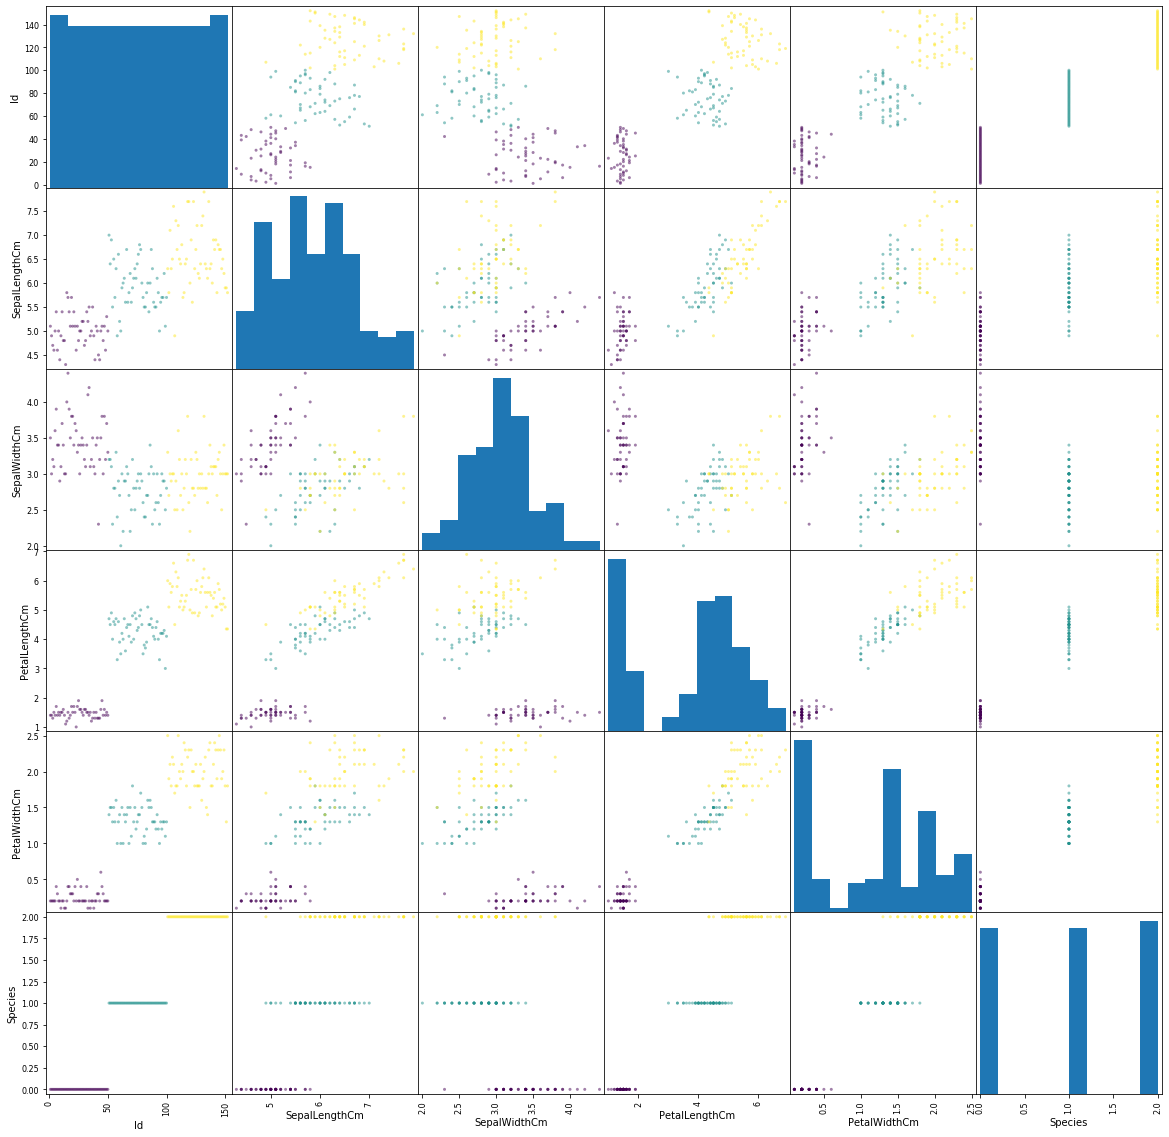

In [13]:
pd.plotting.scatter_matrix(iris_df, c=iris_df['Species'], figsize=(20, 20))

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = iris_df.drop(['Species', 'Id'], axis=1) 
y = iris_df['Species']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [31]:
print(X_train.shape)
print(y_train.shape)

(121, 4)
(121,)


### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 2, 3, 5, 7, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [32]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [2, 3, 5, 7, 9]:
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  print(accuracy_score(y_test, y_pred))            # calculate accuracy

0.967741935483871
0.9354838709677419
0.967741935483871
0.9354838709677419
0.9032258064516129


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [33]:
# empty list that will hold accuracy scores
ac_scores = []

for k in range(1, 20, 2) :
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  score = accuracy_score(y_test, y_pred)           # get accuracy
  ac_scores.append((score, k))                     # append accuracy score
  
# determining best k
print("The max accuracy and optimal number of neighbors is {}".format(max(ac_scores)))

The max accuracy and optimal number of neighbors is (0.967741935483871, 5)


### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

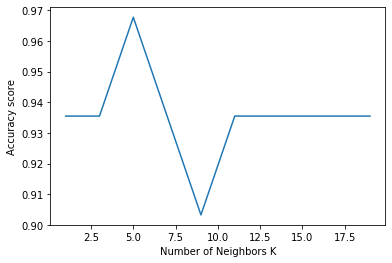

In [34]:
import matplotlib.pyplot as plt

score, k = zip(*ac_scores)
plt.plot(k, score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy score')
plt.show()

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [35]:
# Importing Data file
import pandas as pd
bc_df = pd.read_csv('bc2.csv')
bc_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [36]:
bc_df.shape

(699, 11)

In [37]:
bc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [38]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


#### Check Missing Values

In [39]:
bc_df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [40]:
# This is one way
bc_df[bc_df['Bare Nuclei'] == '?'].shape[0]

# This is another way
len(bc_df[bc_df['Bare Nuclei'] == '?'])

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [41]:
bc_df['Bare Nuclei'].replace({'?': bc_df.describe(include='all')['Bare Nuclei']['top']}, inplace=True)

### Question 5
#### Find the distribution of target variable (Class) 

In [42]:
bc_df["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

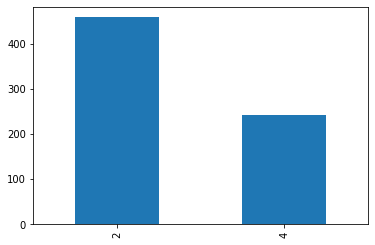

In [44]:
pd.value_counts(bc_df["Class"]).plot(kind="bar")

#### Convert the datatype of Bare Nuclei to `int`

In [45]:
bc_df["Bare Nuclei"] = bc_df["Bare Nuclei"].astype("int")

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FADA06048>,
      dtype=object)

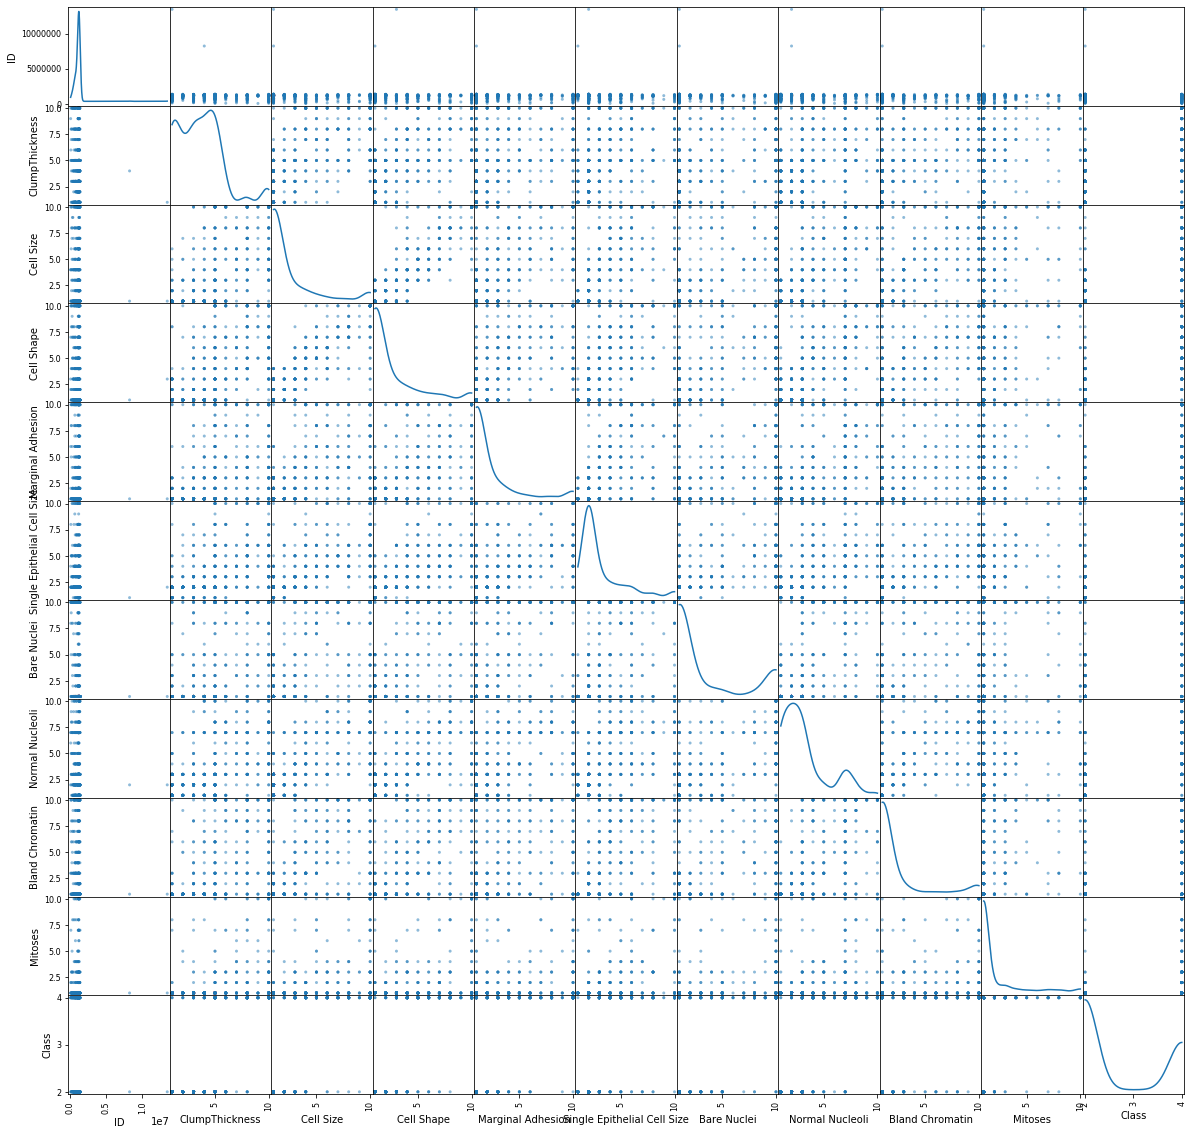

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.scatter_matrix(bc_df, figsize=(20,20), diagonal="kde")

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [47]:
X = bc_df.drop(["ID", "Class", "Cell Shape"], axis=1)
y = bc_df["Class"]

#### Divide the Training and Test sets in 70:30 

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [50]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [3, 5, 9]:
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  print(accuracy_score(y_test, y_pred))            # calculate accuracy

0.9666666666666667
0.9666666666666667
0.9619047619047619


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [51]:
# empty list that will hold accuracy scores
ac_scores = []

for k in range(1, 20, 2) :
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  score = accuracy_score(y_test, y_pred)           # get accuracy
  ac_scores.append((score, k))                     # append accuracy score
  
# determining best k
print("The max accuracy and optimal number of neighbors is {}".format(max(ac_scores)))

The max accuracy and optimal number of neighbors is (0.9666666666666667, 19)


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

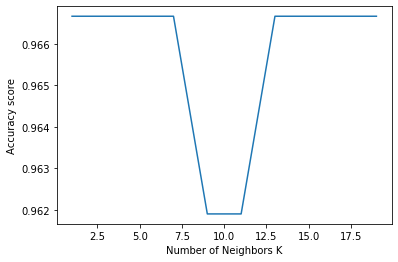

In [52]:
import matplotlib.pyplot as plt

score, k = zip(*ac_scores)
plt.plot(k, score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy score')
plt.show()